# Dataset
This notebook shows information about the used dataset

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

import pandas as pd
from sklearn.model_selection import train_test_split

tfds.disable_progress_bar()
np.set_printoptions(precision=3, suppress=True)

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

Load datasets

In [2]:
def load_data_arrays():
  df_1 = pd.read_csv("../../datasets/1_no_stopwords.csv")
  df_3 = pd.read_csv("../../datasets/3_no_stopwords.csv")
  df_5 = pd.read_csv("../../datasets/5_no_stopwords.csv")
  df_6 = pd.read_csv("../../datasets/6_no_stopwords.csv")

  df = df_1.append(df_3)
  df = df.append(df_5)
  df = df.append(df_6)

  train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df["is_hatespeech"])

  return train_df, test_df

train_df, test_df = load_data_arrays()

Plot data distribution

[155127, 62177]


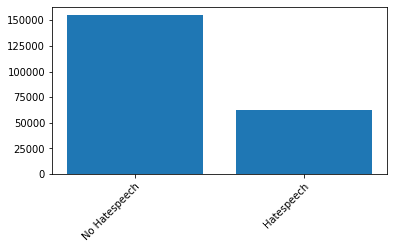

<Figure size 1152x432 with 0 Axes>

In [3]:
def plot_data_distribution(labels_1, label_2):
    total = labels_1.reshape(-1).tolist()
    total.extend(label_2.reshape(-1).tolist())
    bins = sorted(list(set(total)))

    plt.bar(bins, [total.count(bin_val) for bin_val in bins])
    print([total.count(bin_val) for bin_val in bins])
    plt.xticks(bins,
                ["No Hatespeech", "Hatespeech"],
                rotation=45,
                rotation_mode="anchor",
                ha="right")

    plt.subplots_adjust(bottom=0.3)
    plt.figure(figsize=(16, 6))
    plt.show()

    
plot_data_distribution(train_df['is_hatespeech'].values, test_df['is_hatespeech'].values)